<a href="https://colab.research.google.com/github/Bhanu221274/smart-home-energy-prediction/blob/main/smart_home_energy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import files
uploaded = files.upload()



Saving smart_home_energy_consumption_large.csv to smart_home_energy_consumption_large (2).csv


In [47]:
import pandas as pd
import numpy as np

In [48]:
data = pd.read_csv("smart_home_energy_consumption_large.csv")


In [49]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Home ID                   100000 non-null  int64  
 1   Appliance Type            100000 non-null  object 
 2   Energy Consumption (kWh)  100000 non-null  float64
 3   Time                      100000 non-null  object 
 4   Date                      100000 non-null  object 
 5   Outdoor Temperature (°C)  100000 non-null  float64
 6   Season                    100000 non-null  object 
 7   Household Size            100000 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [50]:
data.describe()

,Home ID,Energy Consumption (kWh),Outdoor Temperature (°C),Household Size
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,250.374980,1.499952,14.950135,3.001770
std,144.435367,1.181176,14.438755,1.417077
min,1.000000,0.100000,-10.000000,1.000000
25%,125.000000,0.590000,2.400000,2.000000
50%,250.000000,1.230000,14.900000,3.000000
75%,375.000000,1.870000,27.400000,4.000000
max,500.000000,5.000000,40.000000,5.000000


In [51]:
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])


In [52]:
data.head()

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size,datetime
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2,2023-12-02 21:12:00
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5,2023-08-06 20:11:00
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3,2023-11-21 06:39:00
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1,2023-01-21 21:56:00
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5,2023-08-26 04:31:00


In [53]:
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month
data['weekday'] = data['datetime'].dt.weekday
data['is_weekend'] = data['weekday'].isin([5,6]).astype(int)


In [54]:
data.head()

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size,datetime,hour,day,month,weekday,is_weekend
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2,2023-12-02 21:12:00,21,2,12,5,1
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5,2023-08-06 20:11:00,20,6,8,6,1
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3,2023-11-21 06:39:00,6,21,11,1,0
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1,2023-01-21 21:56:00,21,21,1,5,1
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5,2023-08-26 04:31:00,4,26,8,5,1


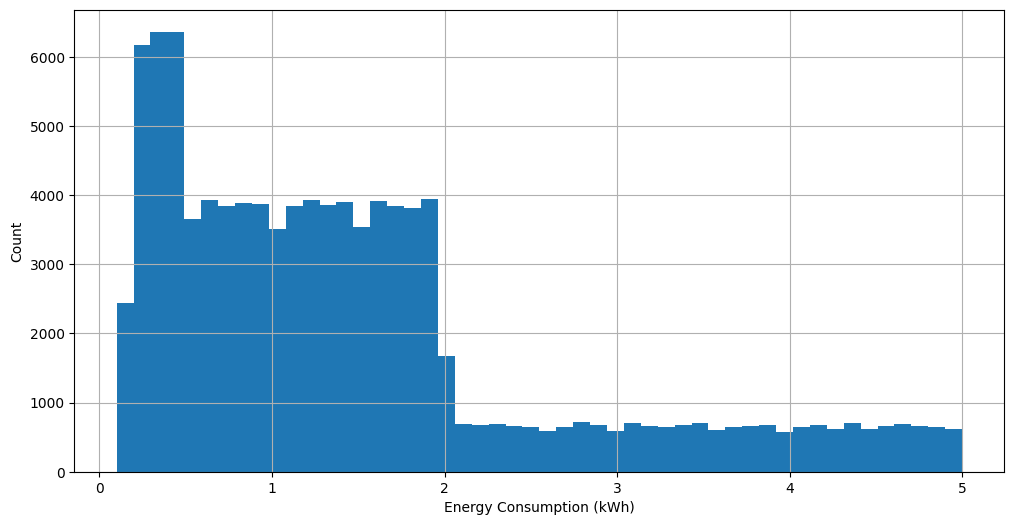

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
data['Energy Consumption (kWh)'].hist(bins=50)
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Count")
plt.show()


In [56]:
data = pd.get_dummies(data, columns=['Appliance Type', 'Season'], drop_first=True)
data.head()

,Home ID,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Household Size,datetime,hour,day,month,...,Appliance Type_Fridge,Appliance Type_Heater,Appliance Type_Lights,Appliance Type_Microwave,Appliance Type_Oven,Appliance Type_TV,Appliance Type_Washing Machine,Season_Spring,Season_Summer,Season_Winter
0,94,0.20,21:12,2023-12-02,-1.0,2,2023-12-02 21:12:00,21,2,12,...,True,False,False,False,False,False,False,False,False,False
1,435,0.23,20:11,2023-08-06,31.1,5,2023-08-06 20:11:00,20,6,8,...,False,False,False,False,True,False,False,False,True,False
2,466,0.32,06:39,2023-11-21,21.3,3,2023-11-21 06:39:00,6,21,11,...,False,False,False,False,False,False,False,False,False,False
3,496,3.92,21:56,2023-01-21,-4.2,1,2023-01-21 21:56:00,21,21,1,...,False,True,False,False,False,False,False,False,False,True
4,137,0.44,04:31,2023-08-26,34.5,5,2023-08-26 04:31:00,4,26,8,...,False,False,False,True,False,False,False,False,True,False


In [57]:
X = data.drop(['Energy Consumption (kWh)', 'datetime', 'Date', 'Time'], axis=1)
y = data['Energy Consumption (kWh)']


In [58]:
from sklearn.model_selection import *
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [60]:
y_pred=model.predict(X_test)

In [61]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.47599430202431947


In [62]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.7575214050257248


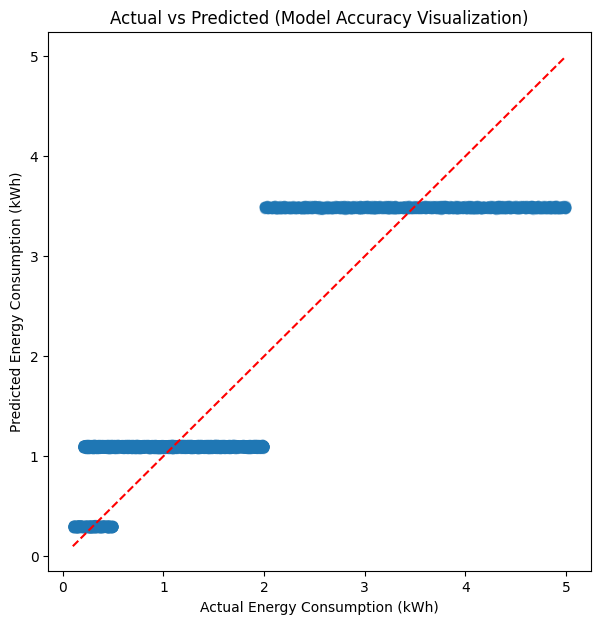

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))

plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.xlabel("Actual Energy Consumption (kWh)")
plt.ylabel("Predicted Energy Consumption (kWh)")
plt.title("Actual vs Predicted (Model Accuracy Visualization)")

plt.show()


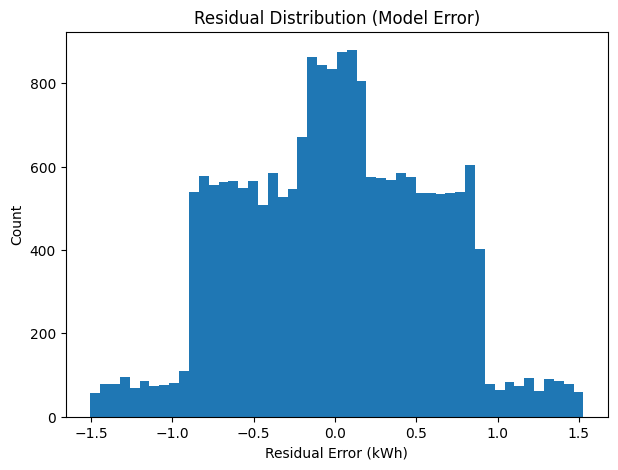

In [64]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.hist(residuals, bins=50)

plt.xlabel("Residual Error (kWh)")
plt.ylabel("Count")
plt.title("Residual Distribution (Model Error)")

plt.show()
